# Распознование многоугольника
Описанный в README.md алгоритм, корректно работает для всех фотографий кроме фото под номером 26.  
Ниже проиллюстрированы промежуточные шаги работы алгоритма. Далее приведен результат его работы на нескольких фотографиях.

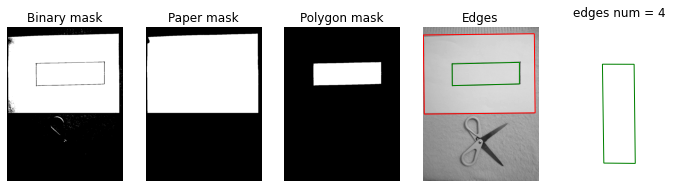

In [1]:
from intelligent_placer_lib import visualization
visualization.detect_polygon_and_show_steps('input/13.jpg')

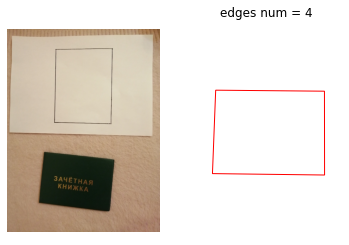

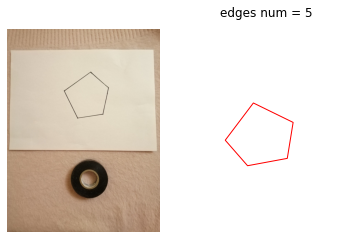

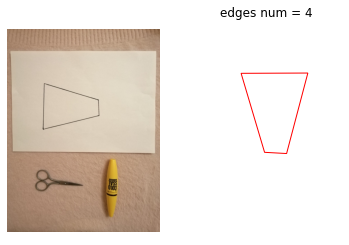

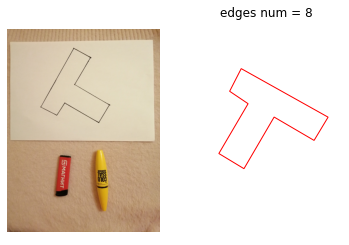

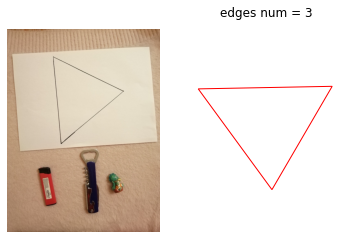

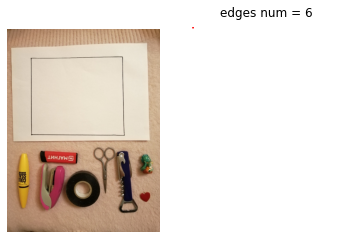

In [2]:
filenames = [1, 7, 20, 22, 24, 26]
for name in filenames:
    visualization.detect_polygon('input/' + str(name) + '.jpg')

# Распознование предметов
Распознование предметов происходит с помощью сопостовления особых точек на входной фотографии с фотографиями каждого из возможных предметов. Если количество полученных совпадений мало, то считаем что предмета на фото нет.  
Этот метод позволяет распознать только 3 предмета из 10. При этом если предмет повернут не той стороной, обнаружить его не удается. Поэтому в следующей версии планируется заменить данный способ распознования другим.

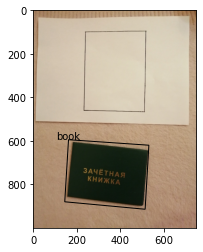

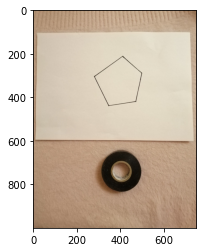

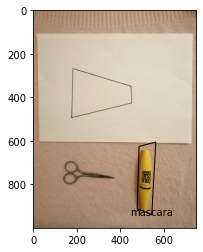

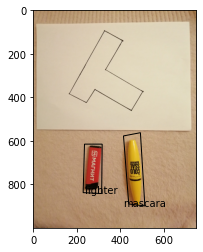

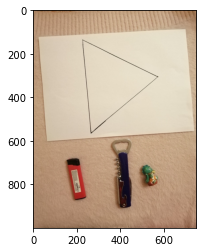

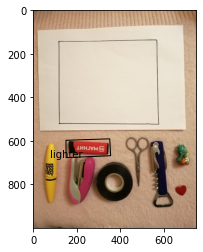

In [3]:
from intelligent_placer_lib import visualization
filenames = [1, 7, 20, 22, 24, 26]
for name in filenames:
    visualization.detect_item('input/' + str(name) + '.jpg')

# Размещение предметов
В первой версии реализованный алгоритм дает ответ на то возможно ли размещение только для выпуклого многоугольника и для одного предмета.  
Так как распознование объктов на фото еще не реализованно, то проверка работы алгоритма производится на заранее выбранном предмете.  
### Алгоритм размещения
Для каждого предмета заранее в коде программы указывается многоугольник, описывающий его, а так же возможные варианты поворота. Они указываются вручную, так как каждый предмет имеет свою симметрию, которую стоит учитывать.  
Далее происходит перебор по всем возможным конфигурациям предмета для каждого из углов многоугольника с попыткой размещения следующим образом:  
1. Определяем систему координат так чтобы ось x совпадала с одной из сторон, а угол между осью y и второй стороной был меньше 90 градусов.
2. Находим преобразование, которое переводит найденные оси в начало координат и применияем его ко всему многоугольнику.
3. В результате одна из сторон многоугольника, ограничивающего предмет, будет находиться на стороне многоугольника с изображения. При этом скорее всего предмет не окажется полностью внутри многоугольника и его будет необходимо сдвинуть вправо. 

Пока ограничимся выпуклыми многоугольниками и считаем что предмет находится внутри если внутри находятся все точки  ограничевающего его многоугольника.   
Для того чтобы проверить, находится ли точка внутри или снаружи, посчитаем число пересечений луча, исходящего из нее в направлении оси х. Если оно нечетно, то точка находится внутри. Если точка находится вне, то длинна этого луча, до пересечения с многоугольником, и есть расстояние на которое необходимо сдвинуть предмет. При этом нужно учитывать ситуации когда точка находится на стороне или близка к ней. Для этого воспользуемся тем что косое произведение равно нулю если вектора коллинеарны. Косое произведение так же помогает определить с какой стороны от прямой находится точка.

Ниже представлен перебор различных вариантов размещения предмета внутри многоугольника.  
Сначала многоугольник распологается так, чтобы одна из его сторон начиналась в начале координат. Затем предмет сдвигается вправо, пока не окажется за ближайшей в этом направлении стороной.  Черным  обозначено начальное положение предмета, красным - сдвинутое.   

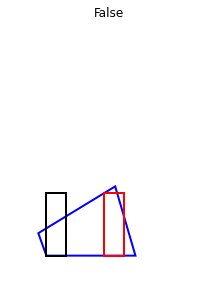

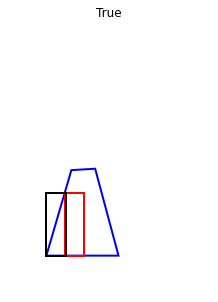

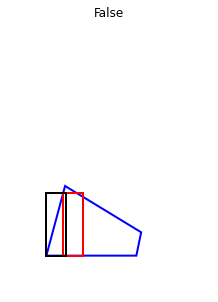

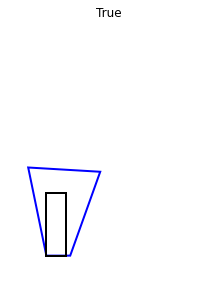

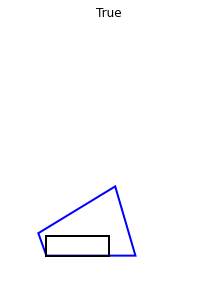

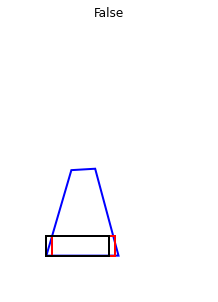

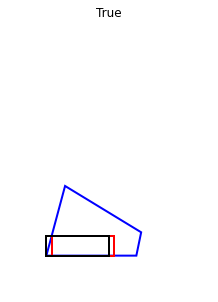

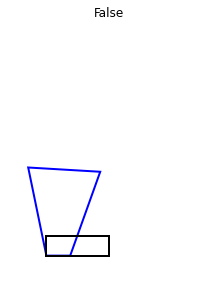

In [4]:
from intelligent_placer_lib import detect_polygon, visualization
poly = detect_polygon.detect_polygon('input/20.jpg')
visualization.variants(poly, 'lighter')

Далее представленны результаты размещения одного из предметов для всех входных многоугольников.

C:\Users\Comp.000\Desktop\Intelligent_Placer\intelligent_placer_lib\visualization.py:106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))


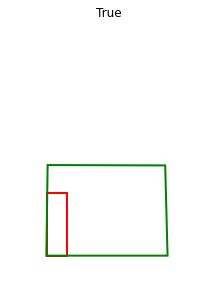

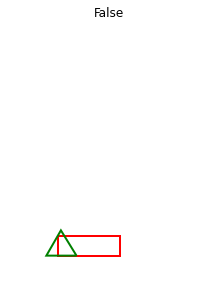

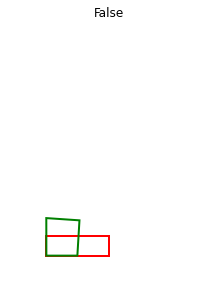

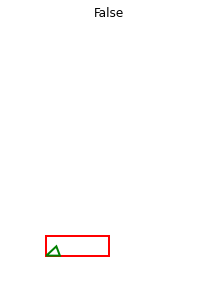

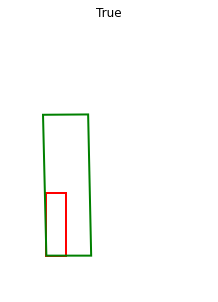

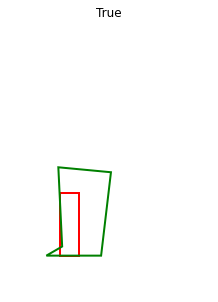

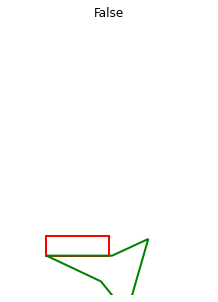

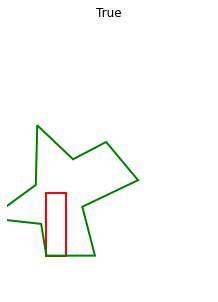

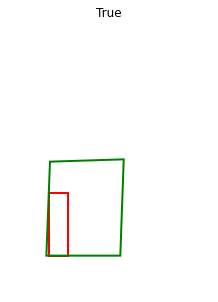

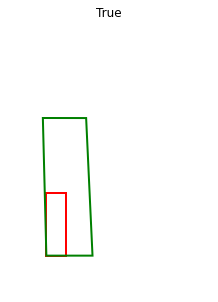

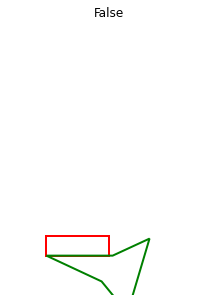

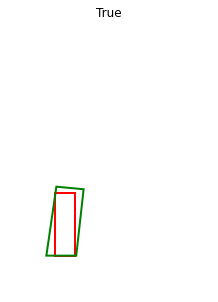

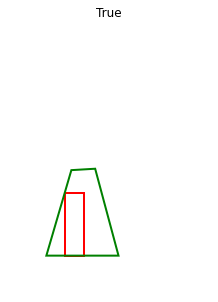

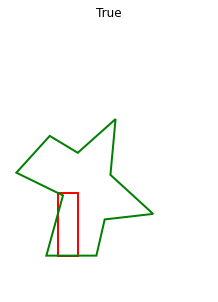

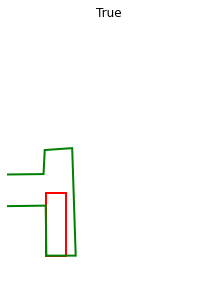

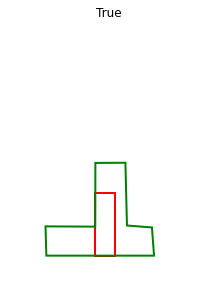

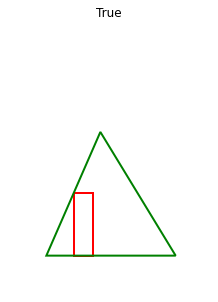

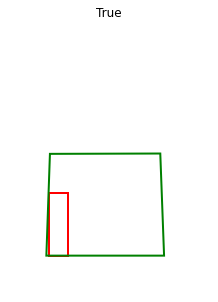

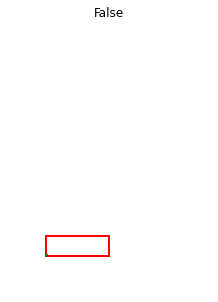

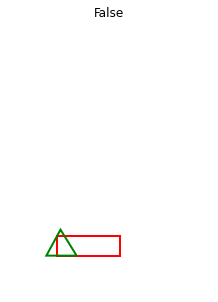

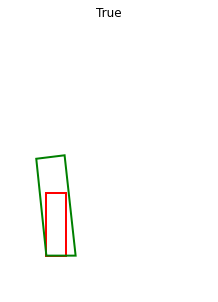

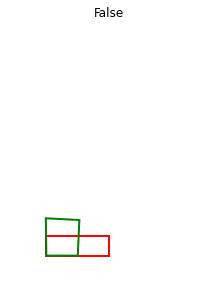

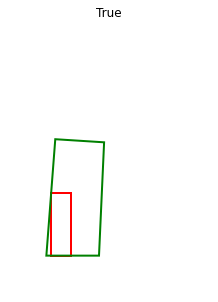

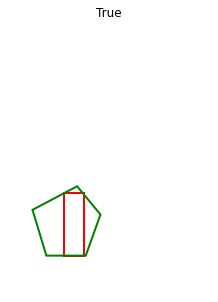

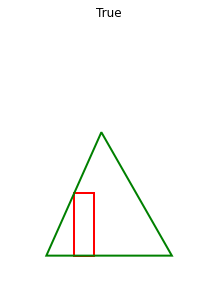

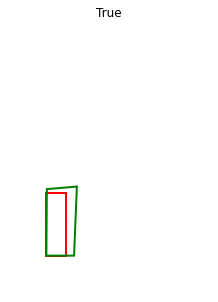

In [5]:
from intelligent_placer_lib import detect_polygon, visualization
import os
path = 'input'
for root, dirs, files in os.walk(path):
    for filename in files:
        poly = detect_polygon.detect_polygon(path + '/' + filename)
        visualization.result(poly, 'lighter')